In [ ]:
#import library
import pandas as pd
import numpy as np

In [ ]:
TWEET_DATA = pd.read_excel("dataset-emosi-twitter-2500.xlsx", engine="openpyxl")
TWEET_DATA.head()

,LABEL,TEKS
0,terkejut,@indomyfess Seokjin\n\nYah pas kenal Bangtan t...
1,jijik,@JaneeeNoLimit Wkwk. Iri dengki dah
2,sedih,Tadi gue lewat jalan yang aga rame orang juala...
3,jijik,@sunrisingbok LWBSKSN yo igual muak
4,terkejut,@moontygf EMG ANJRIT GUA KAGET GWS BGT NAD<U+0...


In [ ]:
#case folding
TWEET_DATA['TEKS'] = TWEET_DATA['TEKS'].str.lower()
print('Case folding :\n')
print(TWEET_DATA['TEKS'].head())

Case folding :

0    @indomyfess seokjin\n\nyah pas kenal bangtan t...
1                  @janeeenolimit wkwk. iri dengki dah
2    tadi gue lewat jalan yang aga rame orang juala...
3                  @sunrisingbok lwbsksn yo igual muak
4    @moontygf emg anjrit gua kaget gws bgt nad<u+0...
Name: TEKS, dtype: object


In [ ]:
#proses tokenizing
import string
import re #regex library

#import word_tokenizing dan freqdisk dari NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# ------ Tokenizing ---------

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

TWEET_DATA['TEKS'] = TWEET_DATA['TEKS'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

TWEET_DATA['TEKS'] = TWEET_DATA['TEKS'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

TWEET_DATA['TEKS'] = TWEET_DATA['TEKS'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

TWEET_DATA['TEKS'] = TWEET_DATA['TEKS'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

TWEET_DATA['TEKS'] = TWEET_DATA['TEKS'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

TWEET_DATA['TEKS'] = TWEET_DATA['TEKS'].apply(remove_singl_char)

# NLTK word rokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

TWEET_DATA['tweet_tokens'] = TWEET_DATA['TEKS'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n')
print(TWEET_DATA['tweet_tokens'].head())
print('\n\n\n')

Tokenizing Result : 

0    [seokjin, yah, pas, kenal, bangtan, tiba, liha...
1                             [wkwk, iri, dengki, dah]
2    [tadi, gue, lewat, jalan, yang, aga, rame, ora...
3                           [lwbsksn, yo, igual, muak]
4       [emg, anjrit, gua, kaget, gws, bgt, naduffuff]
Name: tweet_tokens, dtype: object






In [ ]:
#kalkulasi NLTK freq disk
def freqDist_wrapper(text):
	return FreqDist(text)

TWEET_DATA['tweet_tokens_fdist'] = TWEET_DATA['tweet_tokens'].apply(freqDist_wrapper)

print('Frekuensi token : \n')
print(TWEET_DATA['tweet_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frekuensi token : 

0    [(seokjin, 2), (yah, 1), (pas, 1), (kenal, 1),...
1         [(wkwk, 1), (iri, 1), (dengki, 1), (dah, 1)]
2    [(orang, 2), (gua, 2), (ada, 2), (baju, 2), (g...
3       [(lwbsksn, 1), (yo, 1), (igual, 1), (muak, 1)]
4    [(emg, 1), (anjrit, 1), (gua, 1), (kaget, 1), ...
Name: tweet_tokens_fdist, dtype: object


In [ ]:
#melakukan proses stopwords
from nltk.corpus import stopwords

#mendapatkan stopword dari stopword NLTK
#stopword bahasa Indonesia
list_stopwords = stopwords.words('indonesian')

#melakukan penambahan stopword secara manual
#tambahan ke list stopword bahasa Indonesia secara manual
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# ----------------------- menambahkan stopword dari sebuah file teks ------------------------------------
# membaca file txt stopword dengan menggunakan library pandas
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# melakukan perubahan kata stopword yang ada dilist menjadi spasi
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------
# ubah list ke kamus
list_stopwords = set(list_stopwords)

#hapus stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

TWEET_DATA['tweet_tokens_WSW'] = TWEET_DATA['tweet_tokens'].apply(stopwords_removal)


print(TWEET_DATA['tweet_tokens_WSW'].head())

0    [seokjin, pas, kenal, bangtan, lihat, seokjin,...
1                             [wkwk, iri, dengki, dah]
2    [gue, jalan, aga, rame, orang, jualan, gua, li...
3                           [lwbsksn, yo, igual, muak]
4       [emg, anjrit, gua, kaget, gws, bgt, naduffuff]
Name: tweet_tokens_WSW, dtype: object


In [ ]:
#melakukan proses normalisasi
normalizad_word = pd.read_excel("new_kamusalay.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

TWEET_DATA['tweet_normalized'] = TWEET_DATA['tweet_tokens_WSW'].apply(normalized_term)

TWEET_DATA['tweet_normalized'].head(10)

0    [seok jin, pas, kenal, bangtan, lihat, seok ji...
1                           [wkwk, iri, dengki, sudah]
2    [gue, jalan, aga, ramai, orang, jualan, gue, l...
3                          [lwbsksn, iya, igual, muak]
4    [memang, anjrit, gue, kaget, semoga lekas semb...
5    [kelakuanmu, mencerminkan, kelakuan, pasanganm...
6    [nama pengguna, nama pengguna, promosinya, ter...
7    [relate, banget, kadang, beberapa, sampai, gue...
8                            [spelah, dengki, op, nih]
9    [iri, iri, iri, dengki, iri, penyakit, hati, u...
Name: tweet_normalized, dtype: object

In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in TWEET_DATA['tweet_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

TWEET_DATA['tweet_tokens_stemmed'] = TWEET_DATA['tweet_normalized'].swifter.apply(get_stemmed_term)
print(TWEET_DATA['tweet_tokens_stemmed'])

9273
------------------------
seok jin : seok jin
pas : pas
kenal : kenal
bangtan : bangtan
lihat : lihat
terpesona : pesona
awowkwk : awowkwk
juga : juga
wkwk : wkwk
iri : iri
dengki : dengki
sudah : sudah
gue : gue
jalan : jalan
aga : aga
ramai : ramai
orang : orang
jualan : jual
dagang : dagang
baju : baju
tulisannya : tulis
gila : gila
mesti : mesti
sampai : sampai
kayak : kayak
gitunya : gitunya
kadang : kadang
bingung : bingung
sama : sama
indonesia : indonesia
bersyukurnya : syukur
lwbsksn : lwbsksn
iya : iya
igual : igual
muak : muak
memang : memang
anjrit : anjrit
kaget : kaget
semoga lekas sembuh : moga lekas sembuh
banget : banget
naduffuff : naduffuff
kelakuanmu : laku
mencerminkan : cermin
kelakuan : laku
pasanganmu : pasang
menyebalkan : sebal
pasangan : pasang
teman : teman
nama pengguna : nama guna
promosinya : promosi
terencana : rencana
terlibat : libat
program : program
tempat : tempat
palembang : palembang
survei : survei
dan lain lain : dan lain lain
dibatalkan : b

Pandas Apply:   0%|          | 0/2500 [00:00<?, ?it/s]

0       [seok jin, pas, kenal, bangtan, lihat, seok ji...
1                              [wkwk, iri, dengki, sudah]
2       [gue, jalan, aga, ramai, orang, jual, gue, lih...
3                             [lwbsksn, iya, igual, muak]
4       [memang, anjrit, gue, kaget, moga lekas sembuh...
                              ...                        
2495    [sampah, tengok, letak, skillset, msoffice, er...
2496    [main, kampung, seberang, allah, takjub, devin...
2497    [kadang, takle, fokus, tegak, cerita, sebab, a...
2498    [nangroe, aceh, darussalam, istimewa, al, fati...
2499                                        [sesal, tega]
Name: tweet_tokens_stemmed, Length: 2500, dtype: object


In [ ]:
TWEET_DATA.to_csv("Text_Preprocessing.csv")
TWEET_DATA.to_excel("Text_Preprocessing.xlsx")
TWEET_DATA.to_json("Text_Preprocessing.json")

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel("Text_Preprocessing.xlsx", engine="openpyxl")
data.head()

,Unnamed: 0,LABEL,TEKS,tweet_tokens,tweet_tokens_fdist,tweet_tokens_WSW,tweet_normalized,tweet_tokens_stemmed
0,0,terkejut,seokjin yah pas kenal bangtan tiba lihat seokj...,"['seokjin', 'yah', 'pas', 'kenal', 'bangtan', ...",<FreqDist with 15 samples and 16 outcomes>,"['seokjin', 'pas', 'kenal', 'bangtan', 'lihat'...","['seok jin', 'pas', 'kenal', 'bangtan', 'lihat...","['seok jin', 'pas', 'kenal', 'bangtan', 'lihat..."
1,1,jijik,wkwk iri dengki dah,"['wkwk', 'iri', 'dengki', 'dah']",<FreqDist with 4 samples and 4 outcomes>,"['wkwk', 'iri', 'dengki', 'dah']","['wkwk', 'iri', 'dengki', 'sudah']","['wkwk', 'iri', 'dengki', 'sudah']"
2,2,sedih,tadi gue lewat jalan yang aga rame orang juala...,"['tadi', 'gue', 'lewat', 'jalan', 'yang', 'aga...",<FreqDist with 33 samples and 38 outcomes>,"['gue', 'jalan', 'aga', 'rame', 'orang', 'jual...","['gue', 'jalan', 'aga', 'ramai', 'orang', 'jua...","['gue', 'jalan', 'aga', 'ramai', 'orang', 'jua..."
3,3,jijik,lwbsksn yo igual muak,"['lwbsksn', 'yo', 'igual', 'muak']",<FreqDist with 4 samples and 4 outcomes>,"['lwbsksn', 'yo', 'igual', 'muak']","['lwbsksn', 'iya', 'igual', 'muak']","['lwbsksn', 'iya', 'igual', 'muak']"
4,4,terkejut,emg anjrit gua kaget gws bgt naduffuff,"['emg', 'anjrit', 'gua', 'kaget', 'gws', 'bgt'...",<FreqDist with 7 samples and 7 outcomes>,"['emg', 'anjrit', 'gua', 'kaget', 'gws', 'bgt'...","['memang', 'anjrit', 'gue', 'kaget', 'semoga l...","['memang', 'anjrit', 'gue', 'kaget', 'moga lek..."


In [ ]:
#menghapus data yang kosong
data.dropna(axis=0, subset=['TEKS','LABEL'], inplace=True)

In [ ]:
data.head()

,Unnamed: 0,LABEL,TEKS,tweet_tokens,tweet_tokens_fdist,tweet_tokens_WSW,tweet_normalized,tweet_tokens_stemmed
0,0,terkejut,seokjin yah pas kenal bangtan tiba lihat seokj...,"['seokjin', 'yah', 'pas', 'kenal', 'bangtan', ...",<FreqDist with 15 samples and 16 outcomes>,"['seokjin', 'pas', 'kenal', 'bangtan', 'lihat'...","['seok jin', 'pas', 'kenal', 'bangtan', 'lihat...","['seok jin', 'pas', 'kenal', 'bangtan', 'lihat..."
1,1,jijik,wkwk iri dengki dah,"['wkwk', 'iri', 'dengki', 'dah']",<FreqDist with 4 samples and 4 outcomes>,"['wkwk', 'iri', 'dengki', 'dah']","['wkwk', 'iri', 'dengki', 'sudah']","['wkwk', 'iri', 'dengki', 'sudah']"
2,2,sedih,tadi gue lewat jalan yang aga rame orang juala...,"['tadi', 'gue', 'lewat', 'jalan', 'yang', 'aga...",<FreqDist with 33 samples and 38 outcomes>,"['gue', 'jalan', 'aga', 'rame', 'orang', 'jual...","['gue', 'jalan', 'aga', 'ramai', 'orang', 'jua...","['gue', 'jalan', 'aga', 'ramai', 'orang', 'jua..."
3,3,jijik,lwbsksn yo igual muak,"['lwbsksn', 'yo', 'igual', 'muak']",<FreqDist with 4 samples and 4 outcomes>,"['lwbsksn', 'yo', 'igual', 'muak']","['lwbsksn', 'iya', 'igual', 'muak']","['lwbsksn', 'iya', 'igual', 'muak']"
4,4,terkejut,emg anjrit gua kaget gws bgt naduffuff,"['emg', 'anjrit', 'gua', 'kaget', 'gws', 'bgt'...",<FreqDist with 7 samples and 7 outcomes>,"['emg', 'anjrit', 'gua', 'kaget', 'gws', 'bgt'...","['memang', 'anjrit', 'gue', 'kaget', 'semoga l...","['memang', 'anjrit', 'gue', 'kaget', 'moga lek..."


In [ ]:
#menghitung kalimat yang mengandung LABEL
data.head(9273)['LABEL'].value_counts()

terkejut    723
jijik       716
senang      331
marah       308
sedih       280
takut       142
Name: LABEL, dtype: int64

<BarContainer object of 6 artists>

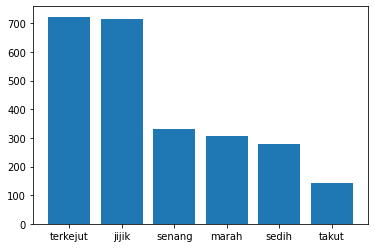

In [ ]:
plt.bar(['terkejut','jijik','senang','marah','sedih','takut'], data.head(9273)['LABEL'].value_counts())

,LABEL
terkejut,723
jijik,716
senang,331
marah,308
sedih,280
takut,142


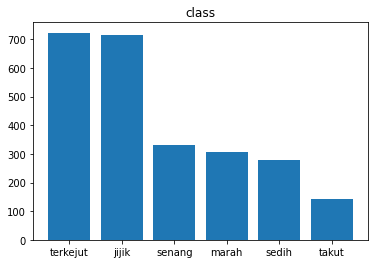

In [ ]:
plt.bar(['terkejut','jijik','senang','marah','sedih','takut'], data.head(9273)['LABEL'].value_counts())
display(data.head(9273)['LABEL'].value_counts().to_frame())
plt.title('class')
plt.show()

In [ ]:
#membuat vektor kalimat
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train, X_test, Y_train, Y_test = train_test_split(data['TEKS'],data['LABEL'], test_size=0.20, random_state=88)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
#tahap tokenisasi
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='', lower=True)
tokenizer.fit_on_texts(data['TEKS'].values)
word_index = tokenizer.word_index

print ('Ditemukan %s unik token.' %len(word_index))

X = tokenizer.texts_to_sequences(data['TEKS'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print ('Shape of data tensor', X.shape)

Ditemukan 10664 unik token.
Shape of data tensor (2500, 250)


In [ ]:
Y = pd.get_dummies(data['LABEL']).values
print('Shape dari label tensor:', Y.shape)

Shape dari label tensor: (2500, 6)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20)

In [ ]:
#hasil test dataset
print('DATA LATIH : ', X_train.shape, Y_train.shape)
print('DATA UJI : ', X_test.shape, Y_test.shape)

DATA LATIH :  (2000, 250) (2000, 6)
DATA UJI :  (500, 250) (500, 6)


,LABEL
terkejut,153
jijik,131
marah,65
senang,62
sedih,59
takut,30


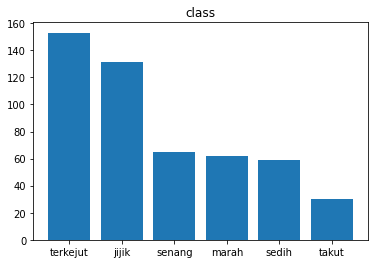

In [ ]:
display(data.head(500)['LABEL'].value_counts().to_frame())
plt.bar(['terkejut','jijik','senang','marah','sedih','takut'], data.head(500)['LABEL'].value_counts())
plt.title('class')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM , Dense, Flatten

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model1 = model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.add(Flatten())
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
_________________________________________________________________
flatten (Flatten)            (None, 2)                 0         
Total params: 5,080,602
Trainable params: 5,080,602
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accurancy'])

In [ ]:
epochs = 5
batch_size = 64

model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test))

Epoch 1/5


ValueError: in user code:

    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py:1809 binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py:5015 binary_crossentropy
        bce = target * tf.math.log(output + epsilon())
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\ops\math_ops.py:1383 binary_op_wrapper
        raise e
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\ops\math_ops.py:1367 binary_op_wrapper
        return func(x, y, name=name)
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\ops\math_ops.py:1710 _mul_dispatch
        return multiply(x, y, name=name)
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\ops\math_ops.py:530 multiply
        return gen_math_ops.mul(x, y, name)
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\ops\gen_math_ops.py:6244 mul
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\framework\func_graph.py:599 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\framework\ops.py:3561 _create_op_internal
        ret = Operation(
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\framework\ops.py:2041 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\Users\10\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\framework\ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 6 and 2 for '{{node binary_crossentropy/mul}} = Mul[T=DT_FLOAT](binary_crossentropy/Cast, binary_crossentropy/Log)' with input shapes: [?,6], [?,2].
